<div class="alert alert-block alert-success">

<h1>Decision Tree | Random Forest - Predicting Hiring</h1> 

- **Problem to solve:** Predict if a candidate would be hired based on specific characteristics; what are the most important features a candidate must have to have higher possibilities of getting the job?
    
**Data Information:** 
   - Years Experience	
   - Employed?
   - Previous employers
   - Level of Education
   - Top-tier school 
   - Interned
   - Hired 

In [1]:
# Import the requierd libraries

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn import tree

In [2]:
# Read the file

input_file = "PastHires.csv"
df = pd.read_csv(input_file, header = 0)

In [3]:
# let's check the first 5 values

df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


<div class="alert alert-block alert-info">

Scikit-learn needs everything to be numerical for decision trees to work. So, we'll map Y,N to 1,0 and levels of education to some scale of 0-2. In the real world, you'd need to think about how to deal with unexpected or missing data! By using map(), we know we'll get NaN for unexpected values.

In [4]:
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)

In [5]:
# Everything should be represented in numbers now, let’s take a look:

df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [6]:
# We need to separate the features from the target column that we're trying to build a decision tree for.

features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [7]:
# Construct the decision tree:

y = df["Hired"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

<div class="alert alert-block alert-info">

To read this decision tree, each condition branches left for "True" and right for "False". The value array represents how many samples exist in each target value. For example, value = [0. 5.] means there are 0 "no hires" and 5 "hires", in contrast, value = [3. 0.] means 3 no-hires and 0 hires.

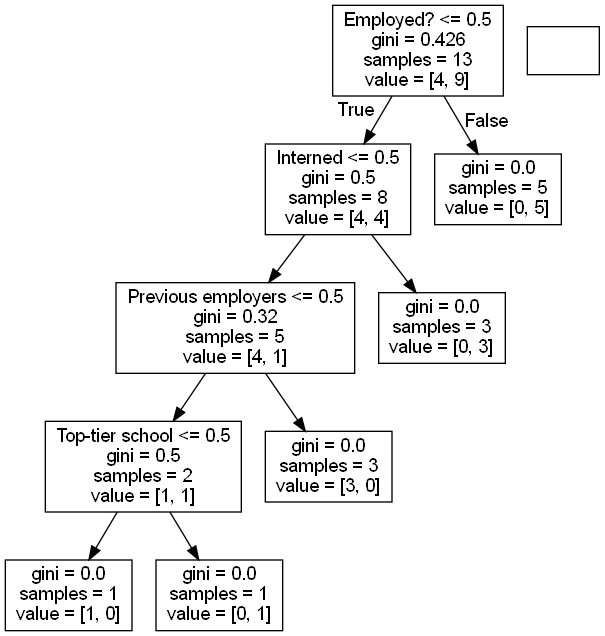

In [8]:
from IPython.display import Image  
from six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

<div class="alert alert-block alert-info">

**Observation:**
The most important feature is the employment status; if the candidate already has a job, the decision tree finishes, 5 out of 5 candidates with jobs got hired, but if the candidate has no job, the second most crucial factor is if they are doing an internship followed by the year of experience, and the level of education is the least important factor.

In [9]:
# Ensemble a random forest of 10 decision trees

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

In [10]:
# Let's use a random forest to predict the employment of specific candidate profiles:

# Predict employment of a 10-year veteran, employed, 4 previous employers, bachelor’s degree, No Top-tier school, and no intern

print (clf.predict([[10, 1, 4, 0, 0, 0]]))

# Predict employment of a 10-year veteran, unemployed, 4 previous employers, bachelor’s degree, No Top-tier school, and no intern

print (clf.predict([[10, 0, 4, 0, 0, 0]]))

[1]
[0]


<div class="alert alert-block alert-info">

**Observation:**
The random forest with 10 decision trees confirmed how the employment variable plays a very important role in this dataset and has a high predictability factor.